## Pandas-datareader 讀真的股票資料

In [9]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
!conda install pandas-datareader -y  # 我們先來裝 pandas-datareader

Solving environment: ...working... done

# All requested packages already installed.



In [11]:
import pandas_datareader as pdr

In [12]:
df = pdr.get_data_yahoo("AAPL")  # 讀入 Apple 股價

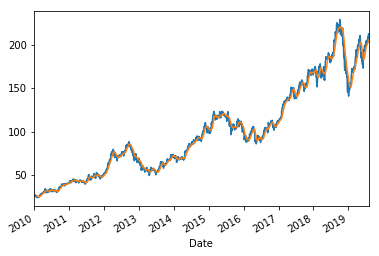

In [13]:
# 看調整收盤價和 20 天的移動平均
df["Adj Close"].plot()
df["Adj Close"].rolling(20).mean().plot()

In [14]:
# 算月 (20 天)、年 (240 天) 的移動平均
df["MA20"] = df["Adj Close"].rolling(20).mean()

In [15]:
df["MA240"] = df["Adj Close"].rolling(240).mean()

In [16]:
# 我們只取近兩年的資料來分析
dfs = df[["Adj Close", "MA20", "MA240"]][-480:]

In [17]:
dfs.columns

Index(['Adj Close', 'MA20', 'MA240'], dtype='object')

In [18]:
dfs.columns = ['Close', 'MA20', 'MA240']

In [19]:
dfs.head()

,Close,MA20,MA240
Date,,,
2017-09-06,157.657867,156.132035,130.463025
2017-09-07,157.024948,156.172446,130.667930
2017-09-08,154.464020,156.333599,130.861488
2017-09-11,157.258652,156.529321,131.065852
2017-09-12,156.635468,156.578495,131.264191


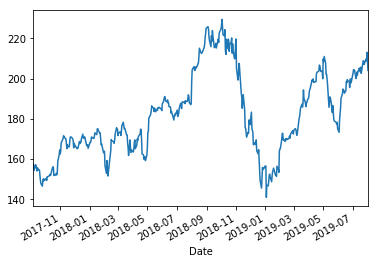

In [20]:
dfs.Close.plot()

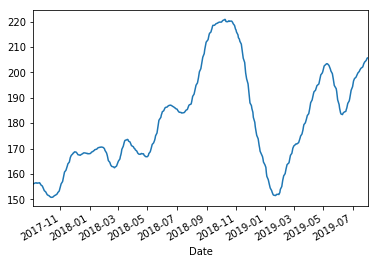

In [21]:
dfs.MA20.plot()

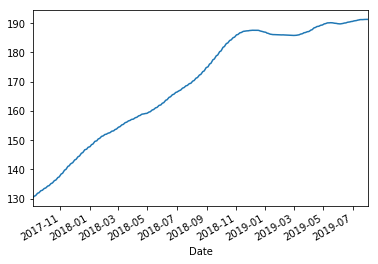

In [22]:
dfs.MA240.plot()

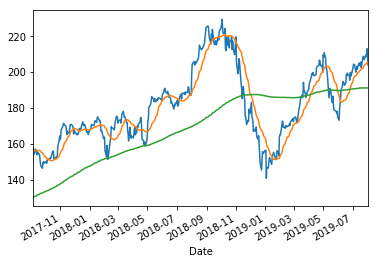

In [23]:
dfs.Close.plot()
dfs.MA20.plot()
dfs.MA240.plot()

## 台股也可以!!

In [38]:
# 我們可以發現讀台股資料也可以, 比如說台積電
df = pdr.get_data_yahoo("2330.TW") 

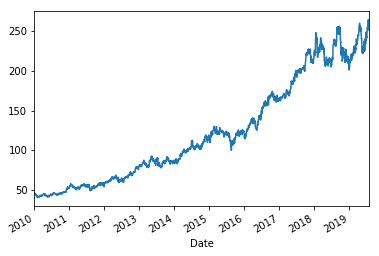

In [39]:
df["Adj Close"].plot()

In [31]:
df[df["Adj Close"].isnull()]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,


In [32]:
df.dropna(inplace=True)

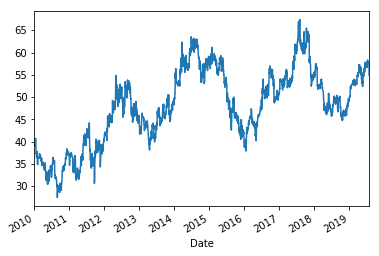

In [33]:
df["Adj Close"].plot()